In [2]:
!pip install openai pandas matplotlib seaborn

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                             63KB  2025-03-07 05:44:03           3318         41  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                              20KB  2025-02-18 06:50:24          10424        186  1.0              
adilshamim8/student-performance-on-an-entrance-examination           Student Performance on an Entrance Examination       4KB  2025-03-04 00:09:21           1051         27  1.0              
mahmoudelhemaly/students-grading-dataset

In [4]:
!kaggle datasets download yasserh/wine-quality-dataset
!unzip /content/wine-quality-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 31.1MB/s]
Archive:  /content/wine-quality-dataset.zip
  inflating: WineQT.csv              


AIがコードを生成

In [ ]:
import openai
import pandas as pd
import os
from google.colab import files

# OpenAI APIキー設定
openai.api_key = "APIキー"

# ======= データの取得 =======
choice = input("データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: ")

if choice == "1":
    print("CSVファイルをアップロードしてください。")
    uploaded = files.upload()  # ファイルアップロード
    filename = list(uploaded.keys())[0]  # アップロードされたファイル名を取得

elif choice == "2":
    folder_path = "/content/data"  # Colab上のデータフォルダ
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    if len(csv_files) == 0:
        print("フォルダ内にCSVファイルが見つかりません。")
        filename = None
    else:
        print("フォルダ内のCSVファイル:", csv_files)
        filename = os.path.join(folder_path, csv_files[0])  # 最初のCSVを選択

else:
    print("無効な選択肢です。1 または 2 を入力してください。")
    filename = None

# ======= データの読み込み =======
if filename:
    df = pd.read_csv(filename)
    print(f"読み込んだデータ: {filename}")
    print(df.head())  # 先頭5行を表示

    # データの統計情報を取得
    data_summary = df.describe().to_string()

    # ======= AIに分析手法を提案させる =======
    prompt_analysis = f"""
    以下のデータの統計情報を元に、適切なデータ分析手法を提案してください。
    ただし、データ分析に不慣れな人向けに、以下の3点を含めて説明してください：
    1. なぜこの分析手法を選んだのか？
    2. どのような情報が得られるのか？
    3. 分析結果の解釈をどのように行うべきか？

    データの統計情報:
    {data_summary}
    """

    response_analysis = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt_analysis}]
    )

    analysis_suggestion = response_analysis.choices[0].message.content
    print("\n=== AIの分析提案 ===\n")
    print(analysis_suggestion)

    # ======= 提案された分析に基づきコードを生成 =======
    prompt_code = f"""
    ユーザーが以下のデータを分析したいと考えています。
    あなたはPythonコードを提供してください。
    提案された分析方法を基に、Pandas、Matplotlib、Seaborn、Scikit-learnを使用してデータ分析を行うPythonコードを書いてください。
    ただし、データフレーム df は既にColab上に存在しているものとして、データの読み込み部分は不要です。

    {analysis_suggestion}
    """

    response_code = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt_code}]
    )

    # AIが生成したコードを取得
    generated_code = response_code.choices[0].message.content

    # ======= 生成したコードを Python ファイルに保存 =======
    with open("generated_code.py", "w") as f:
        f.write(generated_code)

    print("\n=== AIの生成したPythonコード ===")
    print(generated_code)
    print("\n=== 'generated_code.py' に保存されました。次のセルで以下を実行してください: ===")
    print("```python")
    print("%run generated_code.py")
    print("```")


データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: 2
フォルダ内のCSVファイル: ['WineQT.csv']
読み込んだデータ: /content/data/WineQT.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0

生成したコードを実行

Mean Squared Error: 0.3824283521291846
R² Score: 0.31276385395084094
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     46.71
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           3.12e-86
Time:                        14:03:27   Log-Likelihood:                -894.14
No. Observations:                 914   AIC:                             1814.
Df Residuals:                     901   BIC:                             1877.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

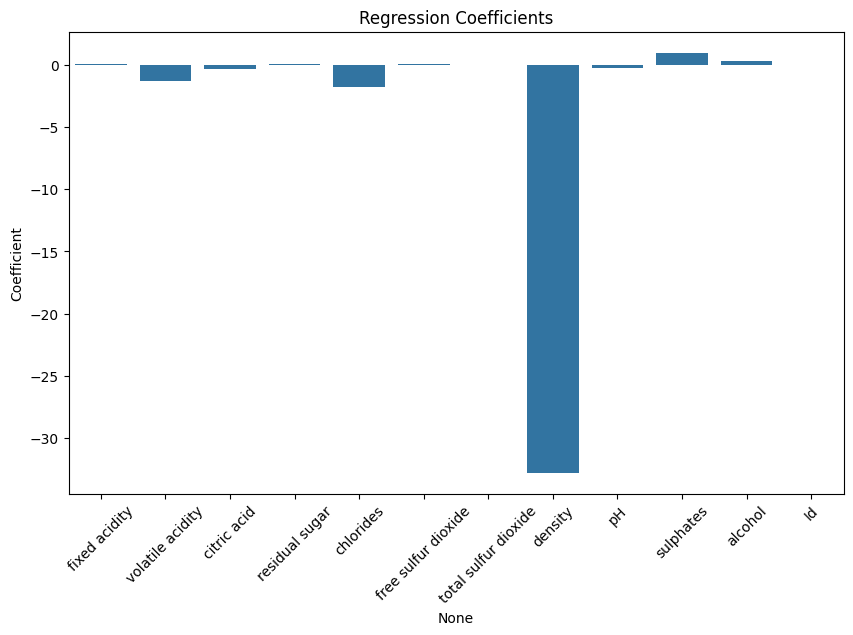

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# データフレーム df は既に存在しているものとします。
# 'quality'を予測するための特徴量とターゲット変数を定義
X = df.drop('quality', axis=1)  # すべての特徴量
y = df['quality']  # ターゲット変数

# 学習用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルを作成
model = LinearRegression()

# モデルを学習
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# 結果の評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Statsmodelsによる詳細な回帰分析
X_train_sm = sm.add_constant(X_train)  # 定数項を追加
model_sm = sm.OLS(y_train, X_train_sm).fit()

# 回帰結果の概要を表示
print(model_sm.summary())

# 回帰係数の視覚化
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.xticks(rotation=45)
plt.title('Regression Coefficients')
plt.show()

考察させる

In [8]:
# ======= AIに分析結果の考察を依頼 =======
prompt_interpretation = f"""
以下のデータについて、AIが選択した分析手法を使いました。
分析結果を見た後、データ分析に不慣れな人向けに、以下の点についてわかりやすく説明してください。

1. この分析結果から何がわかるのか？
2. どのように解釈すればよいのか？
3. もし追加の分析をするなら、どのようなアプローチが考えられるか？

### 実行したコード:
{open("generated_code.py").read()}
"""

response_interpretation = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt_interpretation}]
)

interpretation = response_interpretation.choices[0].message.content

print("\n=== AIの分析結果の考察 ===\n")
print(interpretation)



=== AIの分析結果の考察 ===

この分析結果をデータ分析に不慣れな人向けにわかりやすく説明します。

### 1. この分析結果から何がわかるのか？

この分析は、与えられた特徴量（説明変数）を利用して「quality」（品質）を予測するために線形回帰モデルを使用したものです。結果から以下のことがわかります：

- **平均二乗誤差（MSE）**: これは、予測値と実際の値の差を表す指標です。値が小さいほど、モデルの予測が正確であることを示しています。
- **R²スコア**: これはモデルの適合度を示します。1に近いほど、説明変数がターゲット変数をうまく説明できていることを示しています。0に近いほど予測力が弱いことを意味します。
- **回帰係数**: モデルがどの特徴量に対してどのように反応するかを示します。正の係数はその特徴量が品質を高める方向に寄与し、負の係数は品質を低下させる方向に寄与することを意味します。

### 2. どのように解釈すればよいのか？

- **係数の大きさと符号**: 各特徴量が品質にどのように影響を与えるかがわかります。たとえば、ある特徴量の係数が高い場合、その特徴が品質に対する影響力が強いということです。
- **p値**: 統計的に有意かどうかを判断するために使います。一般的に、p値が0.05以下であれば、その特徴量は品質に対して有意な影響を与えているとみなされます。
- **全体の適合度（R²値）**: モデルがどれほどターゲット変数を説明できるか、即ちモデルの性能を示します。値が0.7以上ならモデルは適切にデータを説明していると考えられます。

### 3. もし追加の分析をするなら、どのようなアプローチが考えられるか？

- **多重共線性の検証**: 特徴量間に高い相関があると、モデルの信頼性が低下します。VIF（Variance Inflation Factor）を使って多重共線性を特定し、必要ならば特徴量を削減してください。
- **外れ値の影響**: 外れ値がモデルにどのような影響を与えているか確認し、場合によっては外れ値を除去するか、何らかの方法で対処します。
- **異なるモデルの使用**: 線形回帰はシンプルな手法ですが、データによっては他の手法（例：ランダムフォレストや勾配ブースティング）を試すこ